<a href="https://colab.research.google.com/github/Almjes/Almejes/blob/main/03_Calculando_indices_de_dados_da_CVM_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Baixando dados da CVM
http://dados.cvm.gov.br/dataset/cia_aberta-doc-dfp

In [1]:
!pip install gspread

In [2]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=b3c863ac175d5467d02d7e446b4f14e2ed30bd23fc4c2f195e7fb8fc55d94f68
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


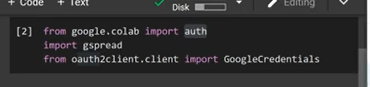

In [ ]:
from google.colab import auth
import gspread
from oauth2client.client import GoogleCredentials


In [133]:
# importando bibliotecas
import pandas as pd 
import wget
from zipfile import ZipFile
from google.colab.data_table import DataTable
import plotly.graph_objects as go
import plotly.express as px


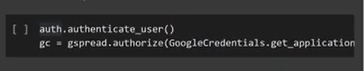

## Integrando google colab  com sheets

In [ ]:
auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
# criando planilha
sh = gc.create('DRE_2010_2021')

In [ ]:
# craindo planilha
sh = gc.create('DEMO_FINAN_2010_2021')
worksheet = sh.get_worksheet(0)

In [ ]:
# salvando planilha
worksheet.update([dre.columns.values.tolist()] + dre.values.tolist())

{'spreadsheetId': '1UXr-EJ4OGmT6eGSjLaTYOBCj1YZlx72ZQXd0u8XWmhw',
 'updatedCells': 4314285,
 'updatedColumns': 15,
 'updatedRange': "'Página1'!A1:O287619",
 'updatedRows': 287619}

In [ ]:
#### Salva os aruivo em sheets do google
for num in range(8):
  worksheet = sh.get_worksheet(0)
  for i in [BPA, BPP, DFC_MD, DFC_MI, DMPL, DRA, DRE, DVA]:
    worksheet.update([i.columns.values.tolist()] + i.values.tolist())


APIError: ignored

### FUNÇÃO PARA ZIP ARQUIVO ANTESD E FAZER O DOWNLOAD 

In [ ]:
def file_compress(inp_file_names, out_zip_file):
  """
  function : file_compress
  args : inp_file_names : list of filenames to be zipped
  out_zip_file : output zip file
  return : none
  assumption : Input file paths and this code is in same directory.
  """
  # Select the compression mode ZIP_DEFLATED for compression
  # or zipfile.ZIP_STORED to just store the file
  compression = zipfile.ZIP_DEFLATED
  print(f" *** Input File name passed for zipping - {inp_file_names}")

  # create the zip file first parameter path/name, second mode
  print(f' *** out_zip_file is - {out_zip_file}')
  zf = zipfile.ZipFile(out_zip_file, mode="w")

  try:
    for file_to_write in inp_file_names:
      # Add file to the zip file
      # first parameter file to zip, second filename in zip
      print(f' *** Processing file {file_to_write}')
      zf.write(file_to_write, file_to_write, compress_type=compression)

  except FileNotFoundError as e:
    print(f' *** Exception occurred during zip process - {e}')
  finally:
    # Don't forget to close the file!
    zf.close()

In [ ]:
import zipfile
file_name_list=list_print 

zip_file_name = "temporary.zip"
file_compress(file_name_list, zip_file_name)

 *** Input File name passed for zipping - ['BPA.csv', 'BPP.csv', 'DFC_MD.csv', 'DFC_MI.csv', 'DMPL.csv', 'DRA.csv', 'DRE.csv', 'DVA.csv']
 *** out_zip_file is - temporary.zip
 *** Processing file BPA.csv
 *** Processing file BPP.csv
 *** Processing file DFC_MD.csv
 *** Processing file DFC_MI.csv
 *** Processing file DMPL.csv
 *** Processing file DRA.csv
 *** Processing file DRE.csv
 *** Processing file DVA.csv


## Acessando a base de dados e criando arquivos históricos

image.png

In [4]:
url_base = 'http://dados.cvm.gov.br/dados/CIA_ABERTA/DOC/DFP/DADOS/'

### Criando uma lista com o nome de todos os arquivos

In [5]:
# criando uma lista com o nome de todos os arquivos
arquivos_zips =[]
for ano in range(2010,2022):
  arquivos_zips.append(f'dfp_cia_aberta_{ano}.zip')
arquivos_zips

['dfp_cia_aberta_2010.zip',
 'dfp_cia_aberta_2011.zip',
 'dfp_cia_aberta_2012.zip',
 'dfp_cia_aberta_2013.zip',
 'dfp_cia_aberta_2014.zip',
 'dfp_cia_aberta_2015.zip',
 'dfp_cia_aberta_2016.zip',
 'dfp_cia_aberta_2017.zip',
 'dfp_cia_aberta_2018.zip',
 'dfp_cia_aberta_2019.zip',
 'dfp_cia_aberta_2020.zip',
 'dfp_cia_aberta_2021.zip']

## Fazendo o download da lista de arquivos gerando usando <b> wget </b>

In [101]:
url_dic ='http://dados.cvm.gov.br/dados/CIA_ABERTA/DOC/ITR/META/meta_itr_cia_aberta_txt.zip'

In [102]:
wget.download(url_dic)


FileNotFoundError: ignored

In [106]:
ZipFile('meta_itr_cia_aberta_txt.zip','r').extractall('CVM')

In [111]:
df_1=pd.read_csv('/content/CVM/meta_itr_cia_aberta_BPA.txt',sep=':',encoding="ISO-8859-1")
df_1

,-----------------------
Campo,CD_CONTA
-----------------------,NaN
Descrição,Código da conta
Domínio,Numérico
Tipo Dados,varchar
...,...
Descrição,Valor da conta
Domínio,Numérico
Tipo Dados,decimal
Precisão,29


In [6]:
for arq in arquivos_zips:
  wget.download(url_base+arq) # todos os arquivo vão para a pasta Sample_data do colab


### extraindo os arquivos do zip com <b> ZipFile

In [7]:
# extrair os arquivos zip
for arq in arquivos_zips:             # extraia tudo para a pasta CMV
  ZipFile(arq,'r').extractall('CVM')  # criando uma pasta chamada CMV


### Criando a pasta Dados, a qual receberá todos os arquivos contatenados por tipo de conta 

In [8]:
!mkdir DADOS

In [9]:
# criando uma base de dados historico
nomes = ['BPA_con','BPA_ind','BPP_con','BPP_ind','DFC_MD_con','DFC_MD_ind','DFC_MI_con','DFC_MI_ind','DMPL_con','DMPL_ind','DRA_con','DRA_ind','DRE_con','DRE_ind','DVA_con','DVA_ind']

for nome in nomes:
  arquivo = pd.DataFrame()
  try:
    for ano in range(2010,2022):
      arquivo= pd.concat([arquivo, pd.read_csv(f'CVM/dfp_cia_aberta_{nome}_{ano}.csv',sep=';',decimal=',', encoding ='ISO-8859-1')])

  except FileNotFoundError:
    continue
     
    

  arquivo.to_csv(f'DADOS/dfp_cia_aberta_{nome}_2010-2021.csv', index = False)  


Usando só os arquivos com sufixo <b> _con

In [15]:
nomes = ['BPA_con','BPP_con''DFC_MD_con','DFC_MI_con','DMPL_con','DRA_con','DRE_con','DVA_con']
BPA = pd.read_csv('/content/DADOS/dfp_cia_aberta_BPA_con_2010-2021.csv')
BPP = pd.read_csv('/content/DADOS/dfp_cia_aberta_BPP_con_2010-2021.csv')
DRE = pd.read_csv('/content/DADOS/dfp_cia_aberta_DRE_con_2010-2021.csv')
DMPL = pd.read_csv('/content/DADOS/dfp_cia_aberta_DMPL_con_2010-2021.csv')
DFC_MD = pd.read_csv('/content/DADOS/dfp_cia_aberta_DFC_MD_con_2010-2021.csv')
DFC_MI = pd.read_csv('/content/DADOS/dfp_cia_aberta_DFC_MI_con_2010-2021.csv')
DRA = pd.read_csv('/content/DADOS/dfp_cia_aberta_DRA_con_2010-2021.csv')
DVA = pd.read_csv('/content/DADOS/dfp_cia_aberta_DVA_con_2010-2021.csv')

In [16]:
# CONSULTA D
lista_empresa =BPA[['DENOM_CIA','CD_CVM']].drop_duplicates().set_index('CD_CVM')
lista_empresa.to_csv('lista_empresa.csv')

In [17]:
empresas = BPA[['DENOM_CIA','CD_CVM']].drop_duplicates().set_index('CD_CVM')
DataTable(empresas)

,DENOM_CIA
CD_CVM,
1023,BCO BRASIL S.A.
14206,BRB BCO DE BRASILIA S.A.
2437,CENTRAIS ELET BRAS S.A. - ELETROBRAS
14451,CIA ENERGETICA DE BRASILIA
14540,VBC ENERGIA SA
...,...
26395,ALMEIDA JUNIOR SHOPPING CENTERS S.A.
26255,TIGRE S.A. PARTICIPAÇÕES
26522,CERRADINHO BIOENERGIA S.A.


In [97]:
empresas =  DFC_MI[['DS_CONTA','CD_CONTA']].drop_duplicates().set_index('CD_CONTA')
DataTable(empresas)

,DS_CONTA
CD_CONTA,
6.01,Caixa Líquido Atividades Operacionais
6.01.01,Caixa Gerado nas Operações
6.01.01.01,Lucro Líquido
6.01.01.02,Efeito da Mudança da Taxa de Câmbio no Caixa o...
6.01.01.03,Provisão para Perdas em Empréstimos a Clientes
...,...
6.01.01.09,Provisão (Reversão) para Perda na Realização d...
6.01.01.10,Provisão / (Reversão) do Ajuste de Estoques ao...
6.01.01.12,Ganho / Perda na Alienação de Investimentos / ...


In [84]:
BPA.columns

Index(['CNPJ_CIA', 'DT_REFER', 'VERSAO', 'DENOM_CIA', 'CD_CVM', 'GRUPO_DFP',
       'MOEDA', 'ESCALA_MOEDA', 'ORDEM_EXERC', 'DT_FIM_EXERC', 'CD_CONTA',
       'DS_CONTA', 'VL_CONTA', 'ST_CONTA_FIXA'],
      dtype='object')

In [26]:
acao = [25186]

In [25]:
# informações sobre o dataframe 
BPA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513528 entries, 0 to 513527
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   CNPJ_CIA       513528 non-null  object 
 1   DT_REFER       513528 non-null  object 
 2   VERSAO         513528 non-null  int64  
 3   DENOM_CIA      513528 non-null  object 
 4   CD_CVM         513528 non-null  int64  
 5   GRUPO_DFP      513528 non-null  object 
 6   MOEDA          513528 non-null  object 
 7   ESCALA_MOEDA   513528 non-null  object 
 8   ORDEM_EXERC    513528 non-null  object 
 9   DT_FIM_EXERC   513528 non-null  object 
 10  CD_CONTA       513528 non-null  object 
 11  DS_CONTA       513528 non-null  object 
 12  VL_CONTA       513528 non-null  float64
 13  ST_CONTA_FIXA  513528 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 54.9+ MB


## CRIANDO DATA FRAME  mm ==> BPA,BBP, DRE, DMPL,DVA, DRA,DFC_MI

In [95]:
#['BPA, BPP, DFC_MD', DFC_MI, DMPL, DRA, DRE, DVA]
df2 =  DFC_MI[DFC_MI.ORDEM_EXERC=='ÚLTIMO']
df2 = df2[['DT_REFER','DENOM_CIA','CD_CVM','DS_CONTA','VL_CONTA']].copy()
df2['DT_REFER']=pd.to_datetime(df2['DT_REFER'])
#df.set_index(df['DT_REFER'], inplace = True)
df2=df2[df2.CD_CVM==25186]
df2.drop(columns=['DENOM_CIA','CD_CVM'], inplace = True)
df2.head()

,DT_REFER,DS_CONTA,VL_CONTA
308076,2019-12-31,Caixa Líquido Atividades Operacionais,325750.0
308078,2019-12-31,Caixa Gerado nas Operações,589157.0
308080,2019-12-31,Variações nos Ativos e Passivos,-227230.0
308082,2019-12-31,Outros,-36177.0
308084,2019-12-31,Caixa Líquido Atividades de Investimento,-194333.0


### união das tables

In [98]:
# mm ==> BPA,BBP, DRE, DMPL,DVA, DRA,DFC_MI
daa = pd.crosstab(df2.DT_REFER, df2.DS_CONTA, values=df2.VL_CONTA, aggfunc='sum').round(0)
dd = pd.crosstab(df.DT_REFER, df.DS_CONTA, values=df.VL_CONTA, aggfunc='sum').round(0)
dd.reset_index('DT_REFER', inplace= True)
daa.reset_index('DT_REFER', inplace= True)
mm=pd.merge(mm, daa, on='DT_REFER', how='right')
mm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Outros_x'} in the result is deprecated and will raise a MergeError in a future version.
  


DS_CONTA,DT_REFER,Aplicações Financeiras,Aplicações Financeiras Avaliadas a Valor Justo através de Outros Resultados Abrangentes,Aplicações Financeiras Avaliadas a Valor Justo através do Resultado,Aplicações Financeiras Avaliadas ao Custo Amortizado,Ativo Circulante,Ativo Não Circulante,Ativo Realizável a Longo Prazo,Ativo Total,Ativos Biológicos,Ativos Não-Correntes a Venda,Ativos de Operações Descontinuadas,Caixa e Equivalentes de Caixa,Clientes,Contas a Receber,Contrato de Concessão,Créditos com Coligadas,Créditos com Controladores,Créditos com Outras Partes Relacionadas,Créditos com Partes Relacionadas,Despesas Antecipadas,Direito de Uso em Arrendamento,Estoques,Goodwill,Imobilizado,Imobilizado em Andamento,Imobilizado em Operação,Imposto de Renda e Contribuição Social Diferidos_x,Intangíveis,Intangível,Investimentos,Outras Contas a Receber,Outros_x,Outros Ativos Circulantes,Outros Ativos Não Circulantes,Outros Investimentos,Outros ativos,Participações Societárias,Participações em Coligadas,Participações em Controladas em Conjunto,...,Pessoal,Provisão/Reversão de Créds. Liquidação Duvidosa,Receitas,Receitas Financeiras_y,Receitas refs. à Construção de Ativos Próprios,Remuneração Direta,Remuneração de Capitais Próprios,Remuneração de Capitais de Terceiros,Resultado de Equivalência Patrimonial_y,Retenções,Valor Adicionado Bruto,Valor Adicionado Líquido Produzido,Valor Adicionado Total a Distribuir,"Vendas de Mercadorias, Produtos e Serviços",Vlr Adicionado Recebido em Transferência,Atribuído a Sócios Não Controladores_y,Atribuído a Sócios da Empresa Controladora_y,Lucro Líquido Consolidado do Período,Outros Resultados Abrangentes,Resultado Abrangente Consolidado do Período,Aumento (Redução) de Caixa e Equivalentes_x,Caixa Gerado nas Operações_x,Caixa Líquido Atividades Operacionais_x,Caixa Líquido Atividades de Financiamento_x,Caixa Líquido Atividades de Investimento_x,Outros_x,Saldo Final de Caixa e Equivalentes_x,Saldo Inicial de Caixa e Equivalentes_x,Variação Cambial s/ Caixa e Equivalentes_x,Variações nos Ativos e Passivos_x,Aumento (Redução) de Caixa e Equivalentes_y,Caixa Gerado nas Operações_y,Caixa Líquido Atividades Operacionais_y,Caixa Líquido Atividades de Financiamento_y,Caixa Líquido Atividades de Investimento_y,Outros_y,Saldo Final de Caixa e Equivalentes_y,Saldo Inicial de Caixa e Equivalentes_y,Variação Cambial s/ Caixa e Equivalentes_y,Variações nos Ativos e Passivos_y
0,2019-12-31,0.0,0.0,14608.0,0.0,2780285.0,1341051.0,128466.0,4121336.0,0.0,0.0,0.0,398263.0,817536.0,817536.0,0.0,0.0,0.0,74651.0,74651.0,11912.0,391809.0,1497411.0,0.0,1212585.0,302444.0,518332.0,0.0,0.0,0.0,0.0,0.0,14496.0,14496.0,818.0,0.0,818.0,0.0,0.0,0.0,...,636674.0,-860.0,9554136.0,71603.0,0.0,551890.0,337695.0,277631.0,0.0,-143803.0,2993337.0,2849534.0,2921137.0,9554996.0,71603.0,94.0,337601.0,337695.0,0.0,337695.0,135585.0,589157.0,325750.0,4168.0,-194333.0,-36177.0,398263.0,262678.0,0.0,-227230.0,135585.0,589157.0,325750.0,4168.0,-194333.0,-36177.0,398263.0,262678.0,0.0,-227230.0
1,2020-12-31,0.0,0.0,14965.0,0.0,6066016.0,2132695.0,193747.0,8198711.0,0.0,0.0,0.0,2112385.0,1305458.0,1305458.0,0.0,0.0,0.0,22166.0,22166.0,14757.0,597051.0,2617533.0,0.0,1938498.0,0.0,1341447.0,0.0,450.0,900.0,0.0,0.0,8758.0,8758.0,1619.0,0.0,1619.0,0.0,0.0,0.0,...,1041656.0,-17471.0,14375547.0,83477.0,0.0,941641.0,726269.0,334163.0,0.0,-192022.0,4366487.0,4174465.0,4257942.0,14393018.0,83477.0,461.0,725808.0,726269.0,0.0,726269.0,1714122.0,1018508.0,-234159.0,2590069.0,-641788.0,-43245.0,2112385.0,398263.0,0.0,-1209422.0,1714122.0,1018508.0,-234159.0,2590069.0,-641788.0,-43245.0,2112385.0,398263.0,0.0,-1209422.0


In [131]:
mm.set_index('DT_REFER', inplace = True)

In [127]:

DES = pd.DataFrame({"DS_CONTA":mm.columns})
DES.head()

,DS_CONTA
0,DT_REFER
1,Aplicações Financeiras
2,Aplicações Financeiras Avaliadas a Valor Justo...
3,Aplicações Financeiras Avaliadas a Valor Justo...
4,Aplicações Financeiras Avaliadas ao Custo Amor...


In [129]:
empresas = DES
DataTable(empresas)

,DS_CONTA
0,DT_REFER
1,Aplicações Financeiras
2,Aplicações Financeiras Avaliadas a Valor Justo...
3,Aplicações Financeiras Avaliadas a Valor Justo...
4,Aplicações Financeiras Avaliadas ao Custo Amor...
...,...
238,Outros_y
239,Saldo Final de Caixa e Equivalentes_y
240,Saldo Inicial de Caixa e Equivalentes_y
241,Variação Cambial s/ Caixa e Equivalentes_y


In [ ]:
# 	Lucro por Ação - (Reais / Ação)  # Reservas de Lucros
mm['Lucro Líquido Consolidado do Período']/(['Ativo Total']-['Passivo Circulante'])

# INDICES DE LIQUIDEZ

In [151]:
Li = mm['Caixa e Equivalentes de Caixa']/mm['Passivo Circulante']
LI = pd.DataFrame(Li, columns = ["Li"]).reset_index()
fig = px.bar(LI, x="DT_REFER", y="Li", width=400, height=400)
fig.show()

In [180]:
print("Quando maior melhor!\nQuanto a empresa tem de Caixa\npara cada $1 de Passivo Circulante.\n",LI)

Quando maior melhor!
Quanto a empresa tem de Caixa
para cada $1 de Passivo Circulante.
     DT_REFER        Li
0 2019-12-31  0.394252
1 2020-12-31  1.551707


In [182]:
LS = (mm['Ativo Circulante']-mm['Estoques'])/mm['Passivo Circulante']

print("Quando maior melhor!\nQuanto a empresa tem de Ativo Líquido\npara cada $1 de Passivo Circulante\n.",LS)

Quando maior melhor!
Quanto a empresa tem de Ativo Líquido
para cada $1 de Passivo Circulante
. DT_REFER
2019-12-31    1.269953
2020-12-31    2.533172
dtype: float64


In [176]:
LC = mm['Ativo Circulante']/mm['Passivo Circulante']
LC 
Quanto a empresa tem de Ativo Circulante\npara cada $1 de Passivo Circulante.

DT_REFER
2019-12-31    2.752283
2020-12-31    4.455948
dtype: float64

In [185]:
LG = (mm['Ativo Circulante']+mm['Ativo Realizável a Longo Prazo'])/(mm['Passivo Circulante']+ mm['Passivo Não Circulante'])
LG

print('Quanto maior, melhor!\nQuanto a empresa tem de Ativo Circulante +\nRealizável a  LP para cada $1 de dívida total.\n',LG)

Quanto maior, melhor!
Quanto a empresa tem de Ativo Circulante +
Realizável a  LP para cada $1 de dívida total.
 DT_REFER
2019-12-31    1.339174
2020-12-31    2.512779
dtype: float64


# ESTRUTURA DO CAPITAL

In [186]:
CT_PL =mm['Remuneração de Capitais de Terceiros']/mm['Patrimônio Líquido Consolidado']

print('Quanto menor, melhor.\nQuanto a empresa tomou de capitais de\nterceiros para cada $100 de capital próprio.\n',CT_PL)

DT_REFER
2019-12-31    0.142427
2020-12-31    0.058548
dtype: float64

In [192]:
PC_CT = mm['Passivo Circulante']/mm['Remuneração de Capitais de Terceiros']

print('Quanto menor, melhor\nQual o percentual de obrigações a curto prazo\nem relação às obrigações totais.\n',PC_CT)

Quanto menor, melhor
Qual o percentual de obrigações a curto prazo
em relação às obrigações totais.
 DT_REFER
2019-12-31    3.638549
2020-12-31    4.073850
dtype: float64


In [193]:
ANC_RLP_PL = (mm['Ativo Não Circulante']-mm['Ativo Realizável a Longo Prazo'])/mm['Patrimônio Líquido Consolidado']


print('Quanto menor, melhor.\nQuanto a empresa aplicou em ativos de baixa\nliquidez para cada $100 de Patrimônio Líquido.\n',ANC_RLP_PL)

Quanto menor, melhor.
Quanto a empresa aplicou em ativos de baixa
liquidez para cada $100 de Patrimônio Líquido.
 DT_REFER
2019-12-31    0.622066
2020-12-31    0.339717
dtype: float64


In [194]:
ANC_RLP_PL_PNC =(mm['Ativo Não Circulante']-mm['Ativo Realizável a Longo Prazo'])/(mm['Patrimônio Líquido Consolidado'] + mm['Passivo Não Circulante'])

print('Quanto menor, melhor!\nQual o percentual de recursos não correntes\ndestinado aos ativos de baixa liquidez.\n',ANC_RLP_PL_PNC)

Quanto menor, melhor!
Qual o percentual de recursos não correntes
destinado aos ativos de baixa liquidez.
 DT_REFER
2019-12-31    0.389753
2020-12-31    0.283581
dtype: float64


# R e n t a b i l i d a d e

In [ ]:
# Outras Receitas Operacionais
Giro = 

In [ ]:
Giro_2 = mm['Receita de Venda de Bens e/ou Serviços'] - (mm['Despesas/Receitas Operacionais' ] + mm['Impostos, Taxas e Contribuições']+ mm[' Despesas com Vendas'] + mm['Outras Despesas Operacionais'])

In [ ]:
Roi = 

#### racunho

In [69]:
for df,nome in zip([BPA, BPP, DFC_MD, DFC_MI, DMPL, DRA, DRE, DVA],['BPA_U','BPP_U', 'DFC_MD_U','DFC_MI_U', 'DMPL_U', 'DRA_U', 'DRE_U', 'DVA_U']):
  df1 = df[['DT_REFER','DENOM_CIA','CD_CVM','DS_CONTA','VL_CONTA']] # filtrando colunas 
  df2 = df1[df1.CD_CVM==25186]
  df2['DT_REFER']=pd.to_datetime(df2['DT_REFER']) # converte esta coluna em data  
  df2.drop(columns=['DENOM_CIA','CD_CVM'], inplace = True) # excluindo as colunas não necessarias para analise 
  df3=pd.crosstab(df2.DT_REFER, df2.DS_CONTA, values=df2.VL_CONTA, aggfunc='sum').round(0)
  df3.to_csv(f'teste/{nome}_GMAT_2.csv', index = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
